In [58]:
#first import the library
from pyforest import *

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#load the dataset
df=pd.read_csv("mushroom.csv")#https://www.kaggle.com/uciml/mushroom-classification
df.head()

<IPython.core.display.Javascript object>

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [59]:
#check the shape of dataset
df.shape

(8124, 23)

In [60]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [61]:
#cheking the null(NaN) value
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<IPython.core.display.Javascript object>

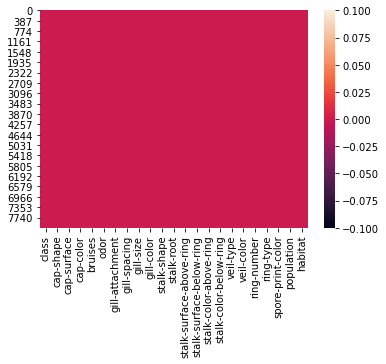

In [62]:
#lets confirm with heatmap

sns.heatmap(df.isnull())

<IPython.core.display.Javascript object>

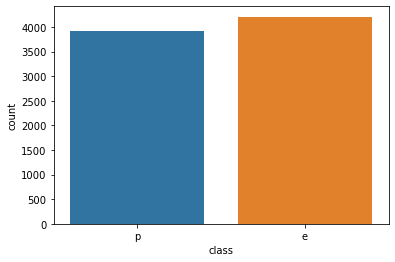

In [63]:
#lets see with countplot
sns.countplot(x="class",data=df)


<IPython.core.display.Javascript object>

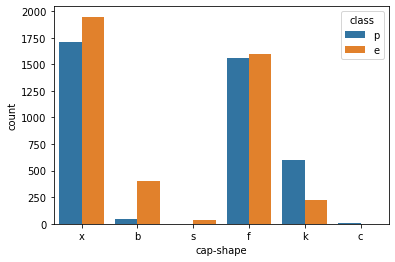

In [64]:
sns.countplot(x="cap-shape",hue="class",data=df)



<IPython.core.display.Javascript object>

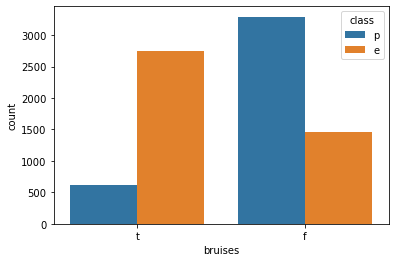

In [65]:
sns.countplot(x="bruises",hue="class",data=df)

<IPython.core.display.Javascript object>

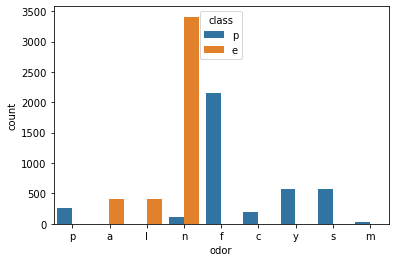

In [66]:
sns.countplot(x="odor",hue="class",data=df)

<IPython.core.display.Javascript object>

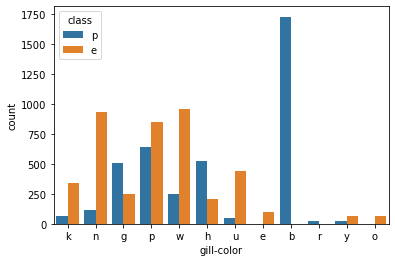

In [67]:
sns.countplot(x="gill-color",hue="class",data=df)

<IPython.core.display.Javascript object>

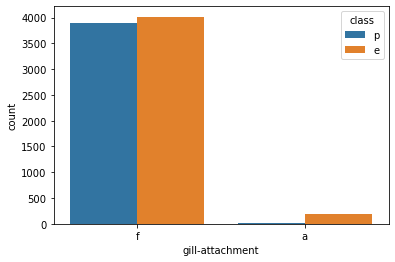

In [68]:
sns.countplot(x='gill-attachment',hue='class',data=df)

<IPython.core.display.Javascript object>

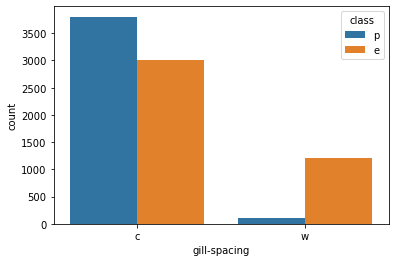

In [69]:
sns.countplot(x='gill-spacing',hue='class',data=df)

<IPython.core.display.Javascript object>

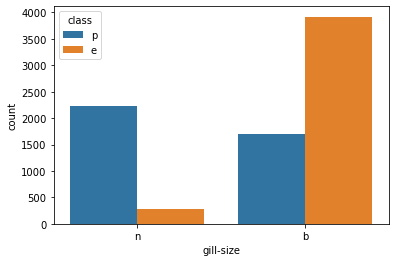

In [70]:
sns.countplot(x='gill-size',hue='class',data=df)

<IPython.core.display.Javascript object>

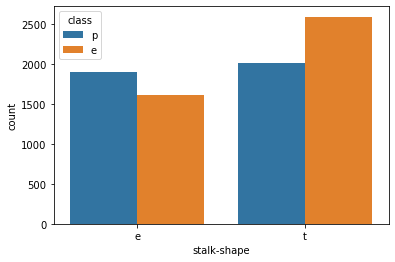

In [71]:
sns.countplot(x='stalk-shape',hue='class',data=df)

<IPython.core.display.Javascript object>

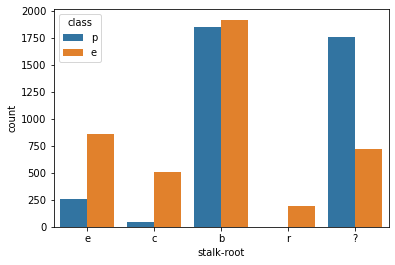

In [72]:
sns.countplot(x='stalk-root',hue='class',data=df)

<IPython.core.display.Javascript object>

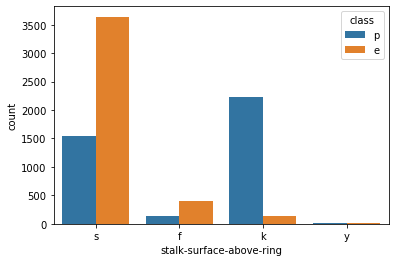

In [73]:
sns.countplot(x='stalk-surface-above-ring',hue='class',data=df)

<IPython.core.display.Javascript object>

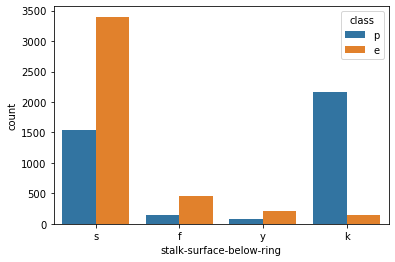

In [74]:
sns.countplot(x='stalk-surface-below-ring',hue='class',data=df)

<IPython.core.display.Javascript object>

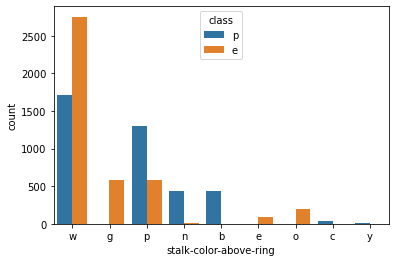

In [75]:
sns.countplot(x='stalk-color-above-ring',hue='class',data=df)

<IPython.core.display.Javascript object>

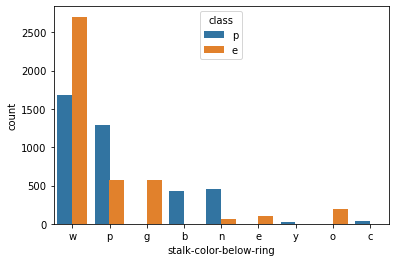

In [76]:
sns.countplot(x='stalk-color-below-ring',hue='class',data=df)

<IPython.core.display.Javascript object>

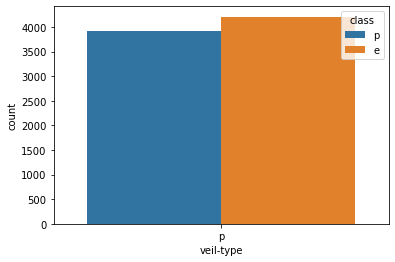

In [77]:
sns.countplot(x='veil-type',hue='class',data=df)

<IPython.core.display.Javascript object>

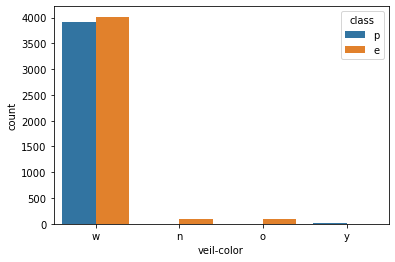

In [78]:
sns.countplot(x='veil-color',hue='class',data=df)

<IPython.core.display.Javascript object>

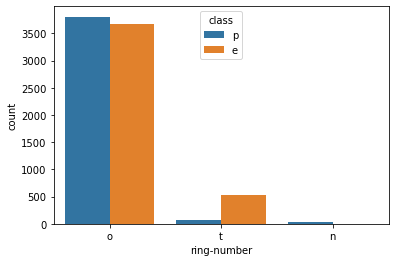

In [79]:
sns.countplot(x='ring-number',hue='class',data=df)

In [80]:
#lets drop the column veil-color as concluded from above
df.drop("veil-color",axis=1,inplace=True)

<IPython.core.display.Javascript object>

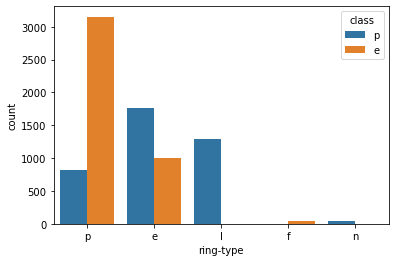

In [81]:
sns.countplot(x='ring-type',hue='class',data=df)

<IPython.core.display.Javascript object>

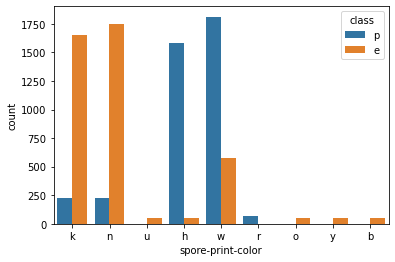

In [82]:
sns.countplot(x='spore-print-color',hue='class',data=df)

<IPython.core.display.Javascript object>

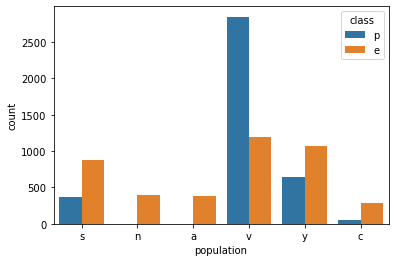

In [83]:
sns.countplot(x='population',hue='class',data=df)

<IPython.core.display.Javascript object>

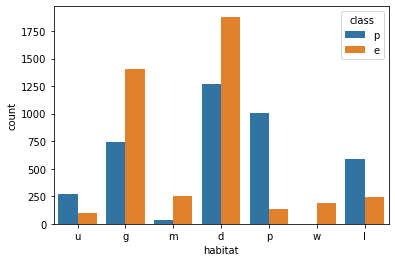

In [84]:
sns.countplot(x='habitat',hue='class',data=df)

In [85]:
#Let's now divide the dataset into input and output(x,y)
df_x=df.drop(columns=["class"])
y=df[["class"]]

In [86]:
#here we can't take label encoder for "x" cuz   acoring to label encodern  "x"  should be a 1d array
#we will convert the input into into integers using get_dummies
df_x=pd.get_dummies(df_x,drop_first=True)
df_x.shape


<IPython.core.display.Javascript object>

(8124, 92)

In [87]:
#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

<IPython.core.display.Javascript object>

In [88]:
#now do the finalsetelldown the x 
from sklearn.decomposition import PCA
pca = PCA(n_components=59)
principalComponents = pca.fit_transform(x)

#Lets chcek information retained after dimensionality reduction
sum(pca.explained_variance_ratio_)

#Lets chcek information retained after dimensionality reduction


0.9744468501817735

In [89]:
#noe time to convert the y into integers
#lets use labelencoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [90]:
from sklearn.metrics import accuracy_score

def max_accuracy_score(clf,x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=accuracy_score(y_test,y_pred)
        print("accuracyscore corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [91]:
from sklearn.model_selection import cross_val_score
def kfold(clf,x,y,):
    print("Mean roc auccuracy score for",clf,cross_val_score(clf,x,y,cv=5,scoring="accuracy").mean())
    print("standard deviation inaccuracy_scoref or",clf,cross_val_score(clf,x,y,cv=5,scoring="accuracy").std())
    print(cross_val_score(clf,x,y,cv=5,scoring="accuracy"))

In [92]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_accuracy_score(lg,principalComponents,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.9993846153846154
max accuracy score corresponding to  45  is  1.0


45

In [93]:
#cross_val_score for LogisticRegressor
kfold(lg,principalComponents,y)

Mean roc auccuracy score for LogisticRegression() 0.9110985221674877
standard deviation inaccuracy_scoref or LogisticRegression() 0.12617983891268506
[0.88246154 0.99938462 0.99815385 1.         0.67549261]


In [94]:
#lets do with some hypoparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,40)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="accuracy")
clf.fit(principalComponents,y)
clf.best_params_

{'n_neighbors': 2}

In [95]:
kn=KNeighborsClassifier(n_neighbors=2)
max_accuracy_score(kn,principalComponents,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  1.0
max accuracy score corresponding to  43  is  1.0


43

In [96]:
#cross_val_score for KNeighborsClassifier
kfold(kn,principalComponents,y)

Mean roc auccuracy score for KNeighborsClassifier(n_neighbors=2) 0.9356104585070103
standard deviation inaccuracy_scoref or KNeighborsClassifier(n_neighbors=2) 0.077693204240744
[0.84615385 1.         0.99692308 1.         0.83497537]


In [97]:
#lets use decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_accuracy_score(dc,principalComponents,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.9956923076923077


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.9950769230769231


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.9938461538461538


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.9950769230769231


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.9969230769230769


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.9969230769230769


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.9969230769230769


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.9975384615384615


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.9969230769230769


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.9969230769230769


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.9975384615384615


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.9950769230769231


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.9950769230769231


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.9975384615384615


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.9975384615384615


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.9956923076923077


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.9950769230769231


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.9975384615384615


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.9956923076923077


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.9944615384615385


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.9969230769230769


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.9956923076923077


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.9944615384615385


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.9950769230769231


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.9944615384615385


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.9944615384615385


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.9963076923076923


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.9926153846153846


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.9969230769230769


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.9938461538461538


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.9981538461538462
max accuracy score corresponding to  69  is  1.0


69

In [98]:
#cross_val_score for DecisionTreeClassifier
kfold(dc,principalComponents,y)

Mean roc auccuracy score for DecisionTreeClassifier() 0.9321702159909057
standard deviation inaccuracy_scoref or DecisionTreeClassifier() 0.05925650597185357
[0.84430769 0.99692308 0.94461538 0.99753846 0.89408867]


In [99]:
#lets use ensemble calssifier such as random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="f1")
clf.fit(principalComponents,y)
clf.best_params_

{'n_estimators': 10}

In [100]:
rnd_clf=RandomForestClassifier(n_estimators=10)
max_accuracy_score(rnd_clf,principalComponents,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.9969230769230769


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.9975384615384615


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  1.0
max accuracy score corresponding to  45  is  1.0


45

In [101]:
kfold(rnd_clf,principalComponents,y)

Mean roc auccuracy score for RandomForestClassifier(n_estimators=10) 0.9228053050397879
standard deviation inaccuracy_scoref or RandomForestClassifier(n_estimators=10) 0.12159942938205162
[0.81784615 1.         0.98830769 1.         0.7887931 ]


In [102]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(principalComponents,y)
clf.best_params_

{'C': 1, 'kernel': 'poly'}

In [103]:
svc=SVC(kernel="poly",C=1)
max_accuracy_score(svc,principalComponents,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.9981538461538462


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  1.0


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.9987692307692307


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.9993846153846154


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.9993846153846154
max accuracy score corresponding to  45  is  1.0


45

In [104]:
kfold(svc,principalComponents,y)

Mean roc auccuracy score for SVC(C=1, kernel='poly') 0.950143160287988
standard deviation inaccuracy_scoref or SVC(C=1, kernel='poly') 0.06316162403134531
[0.84246154 0.99938462 0.99569231 1.         0.91317734]


In [105]:
#comparitively SVM is performing better so lets use svm
#random state 45
svc=SVC(kernel="poly",C=0.1)
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 45,test_size=0.20,stratify=y)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

<IPython.core.display.Javascript object>

In [106]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("accuracy score is : ",accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[842   0]
 [  0 783]]
f1 score is :  1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

AUC ROC Score:  1.0


In [107]:
#Lets save the above model
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(svc, 'mushroom_org.pkl')

['mushroom_org.pkl']